In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('./datasets/japan_noto.csv')
df2 = pd.read_csv('./datasets/turkey.csv')
df3 = pd.read_csv('./datasets/mexico.csv')
df4 = pd.read_csv('./datasets/italy.csv')
df5 = pd.read_csv('./datasets/usa.csv')
df6 = pd.read_csv('./datasets/canada.csv')
df7 = pd.read_csv('./datasets/results_27.csv')
df8 = pd.read_csv('./datasets/results_26_27.csv')

In [7]:
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]
loc_list = ["Japan", "Turkey", "Mexico", "Italy", "USA", "Canada", "Results_27", "Results_26_27"]

In [ ]:
def compute_metrics(row):
    # Handle missing or null entries
    if pd.isna(row['gpe']) or pd.isna(row['detected_gpe']):
        return pd.Series([None, None, None])

    # Convert to sets, strip whitespace, lowercase for consistency
    true_set = map(str.strip, row['gpe'].lower().split(','))
    pred_set = map(str.strip, row['detected_gpe'].lower().split(','))

    if len(pred_set) == 0:
        precision = 0.0
    else:
        precision = len(true_set & pred_set) / len(pred_set)

    if len(true_set) == 0:
        recall = 0.0
    else:
        recall = len(true_set & pred_set) / len(true_set)

    if precision + recall == 0:
        f1 = 0.0
    else:
        f1 = 2 * precision * recall / (precision + recall)

    return pd.Series([precision, recall, f1])

In [5]:
def plot_matrices(df, loc):
    # Apply to DataFrame
    df[['precision', 'recall', 'f1']] = df.apply(compute_metrics, axis=1)

    # Drop rows where metrics couldn't be computed
    df = df.dropna(subset=['precision', 'recall', 'f1'])

    # Compute Macro Averages
    macro_precision = df['precision'].mean()
    macro_recall = df['recall'].mean()
    macro_f1 = df['f1'].mean()

    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall: {macro_recall:.4f}")
    print(f"Macro F1 Score: {macro_f1:.4f}")
    print(f'Location : {loc}')
    sns.set(style='whitegrid')

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Precision KDE plot
    sns.kdeplot(df['precision'], fill=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Precision Density')
    axes[0].set_xlabel('Precision')
    axes[0].set_xlim(0, 1)

    # Recall KDE plot
    sns.kdeplot(df['recall'], fill=True, ax=axes[1], color='lightgreen')
    axes[1].set_title('Recall Density')
    axes[1].set_xlabel('Recall')
    axes[1].set_xlim(0, 1)

    # F1 Score KDE plot
    sns.kdeplot(df['f1'], fill=True, ax=axes[2], color='salmon')
    axes[2].set_title('F1 Score Density')
    axes[2].set_xlabel('F1 Score')
    axes[2].set_xlim(0, 1)

    # Optional: Tweak layout
    # plt.title(f'Location : {loc}')
    plt.tight_layout()
    plt.show()

Macro Precision: 0.4646
Macro Recall: 0.5036
Macro F1 Score: 0.4623
Location : Japan


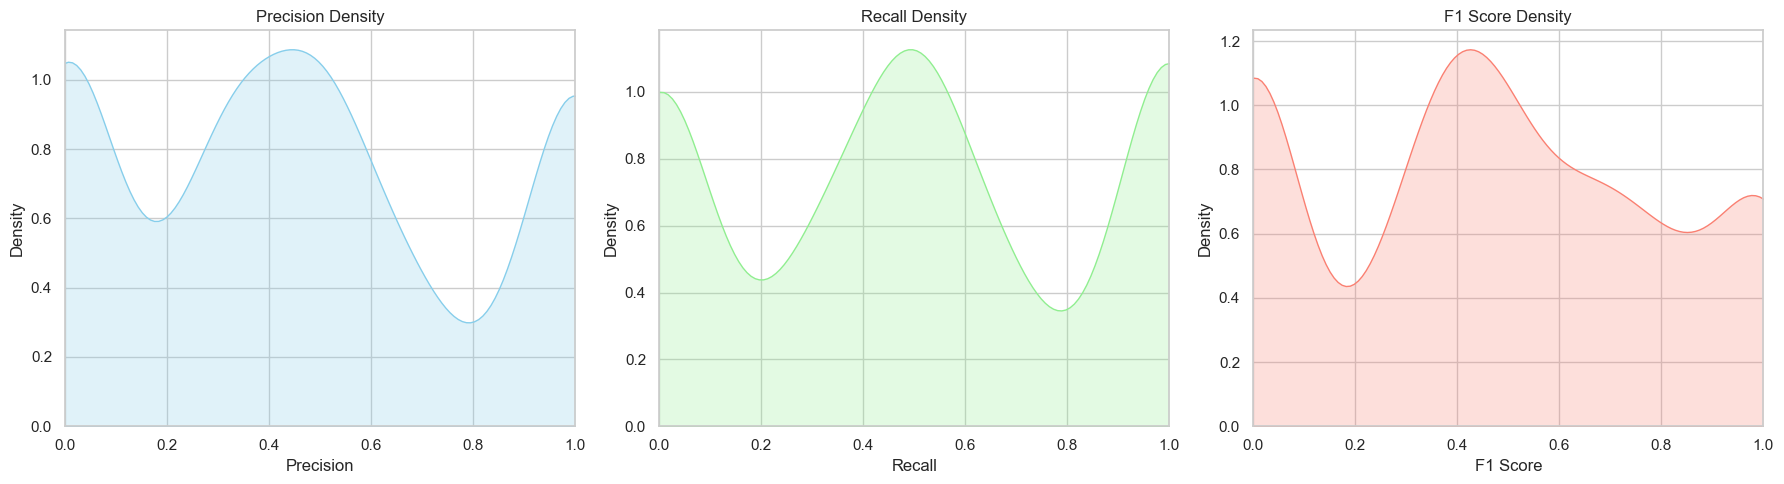

Macro Precision: 0.5379
Macro Recall: 0.7431
Macro F1 Score: 0.5945
Location : Turkey


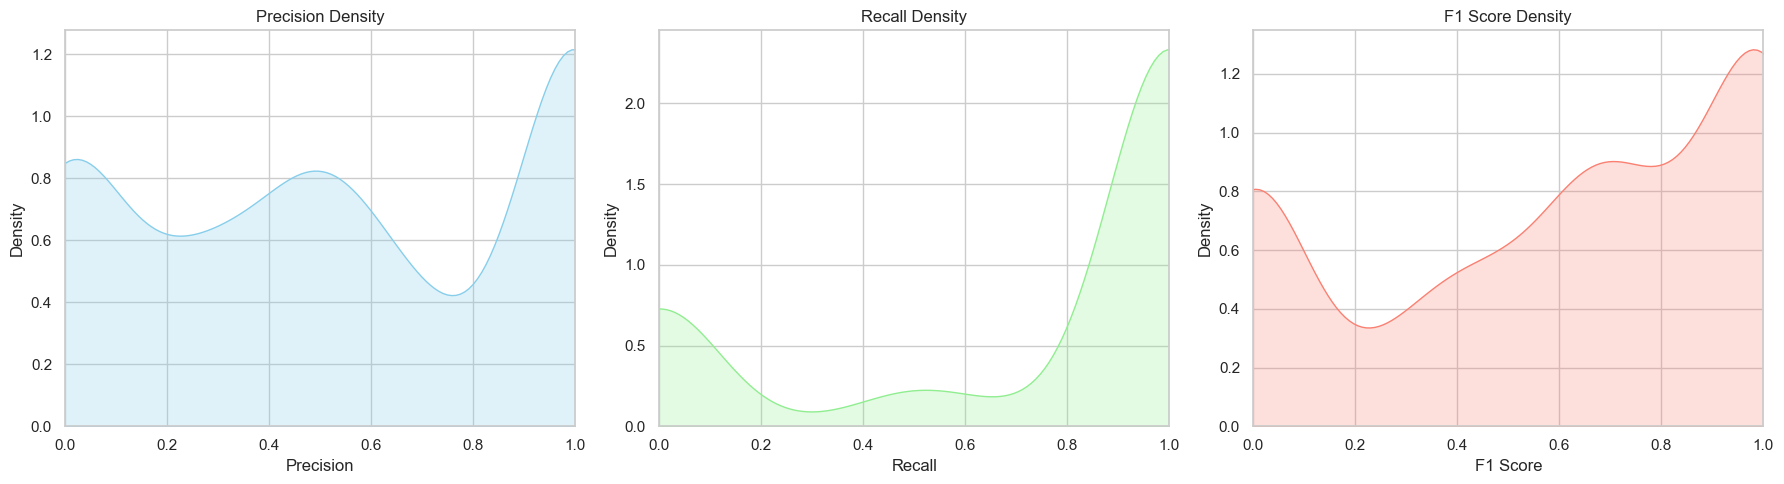

Macro Precision: 0.5362
Macro Recall: 0.7959
Macro F1 Score: 0.6116
Location : Mexico


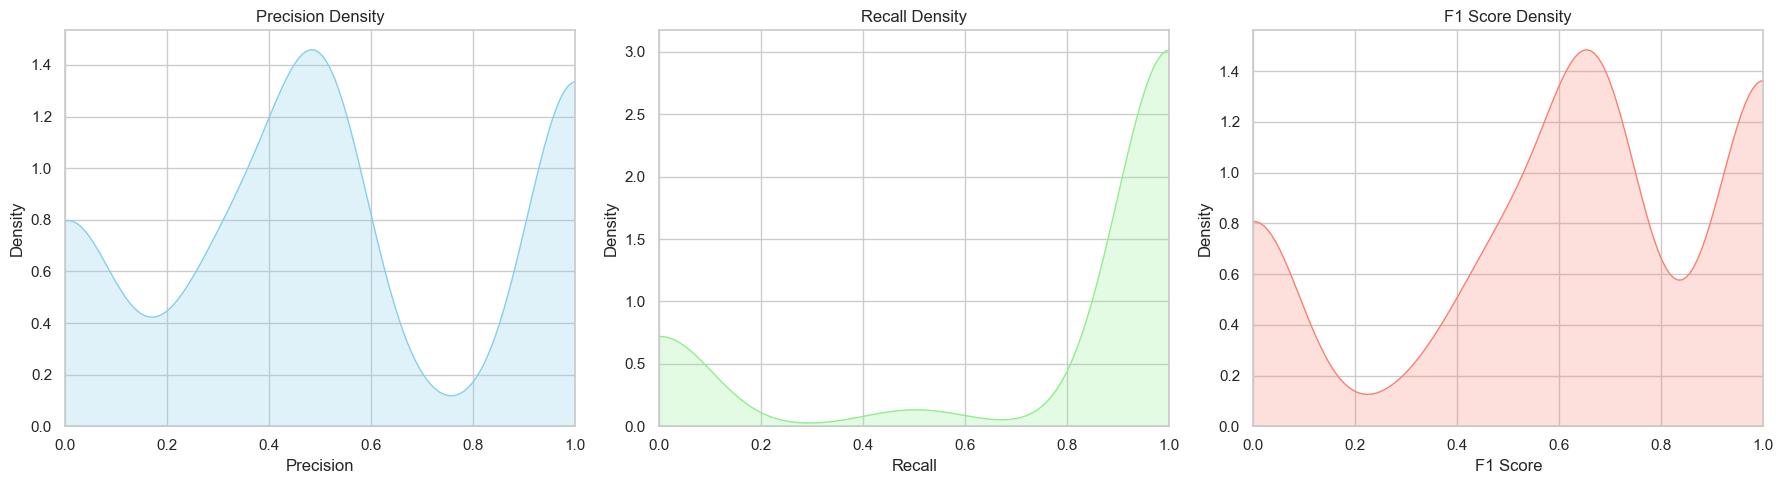

Macro Precision: 0.4547
Macro Recall: 0.7438
Macro F1 Score: 0.5360
Location : Italy


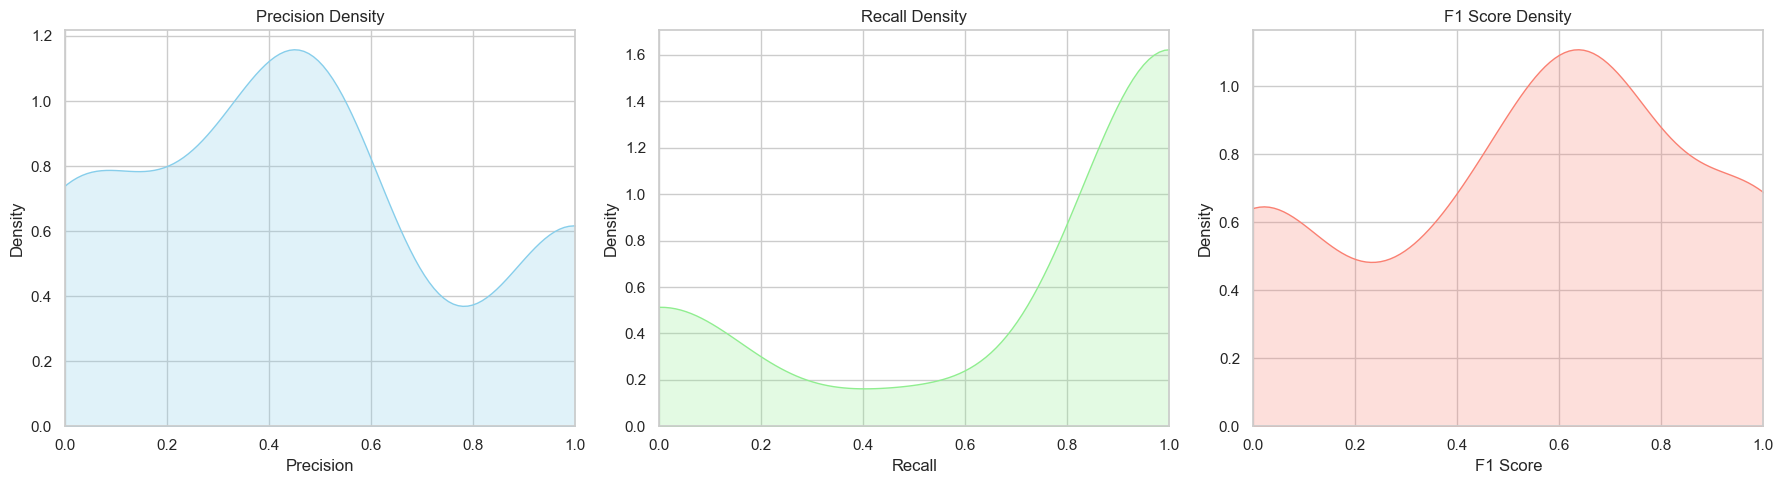

Macro Precision: 0.3887
Macro Recall: 0.6470
Macro F1 Score: 0.4626
Location : USA


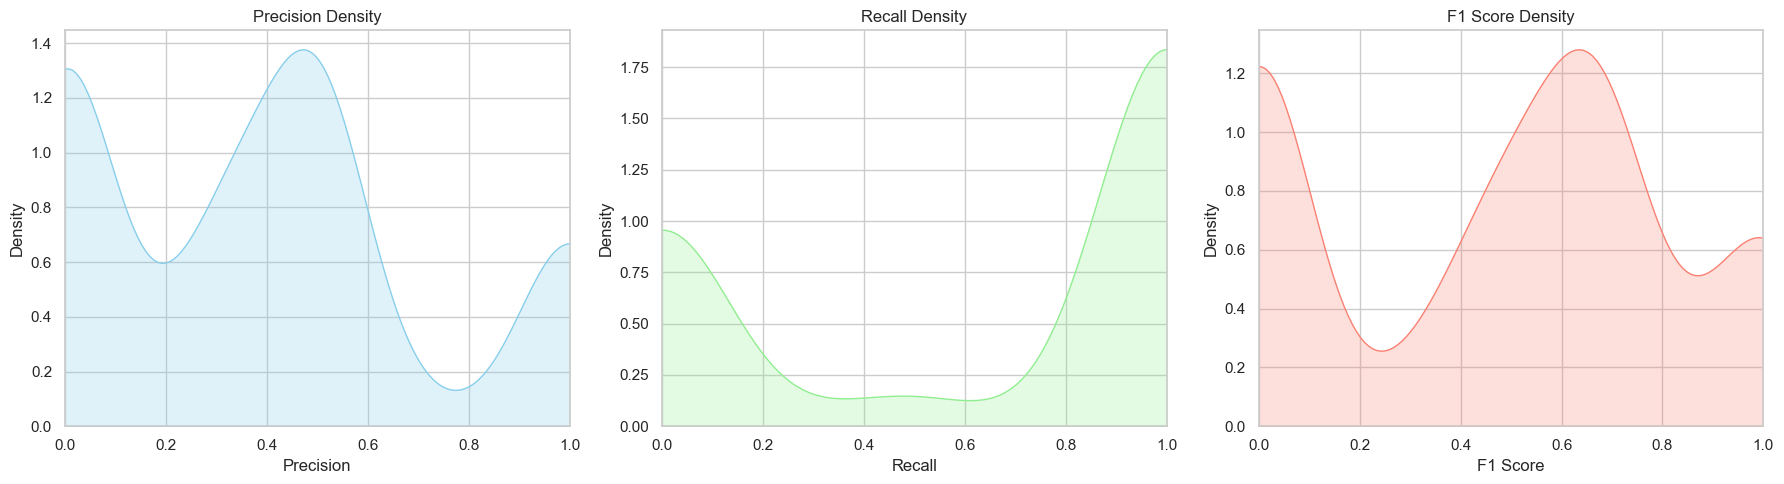

Macro Precision: 0.4358
Macro Recall: 0.7096
Macro F1 Score: 0.5164
Location : Canada


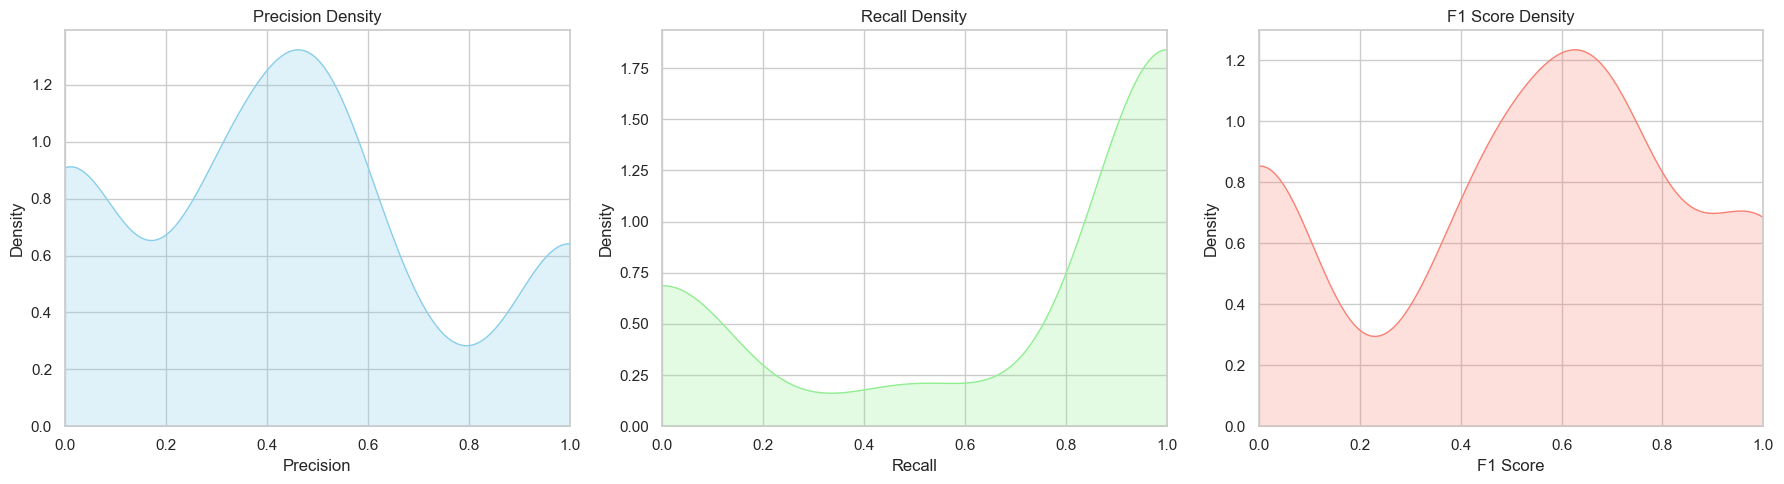

Macro Precision: 0.3948
Macro Recall: 0.3581
Macro F1 Score: 0.3415
Location : Results_27


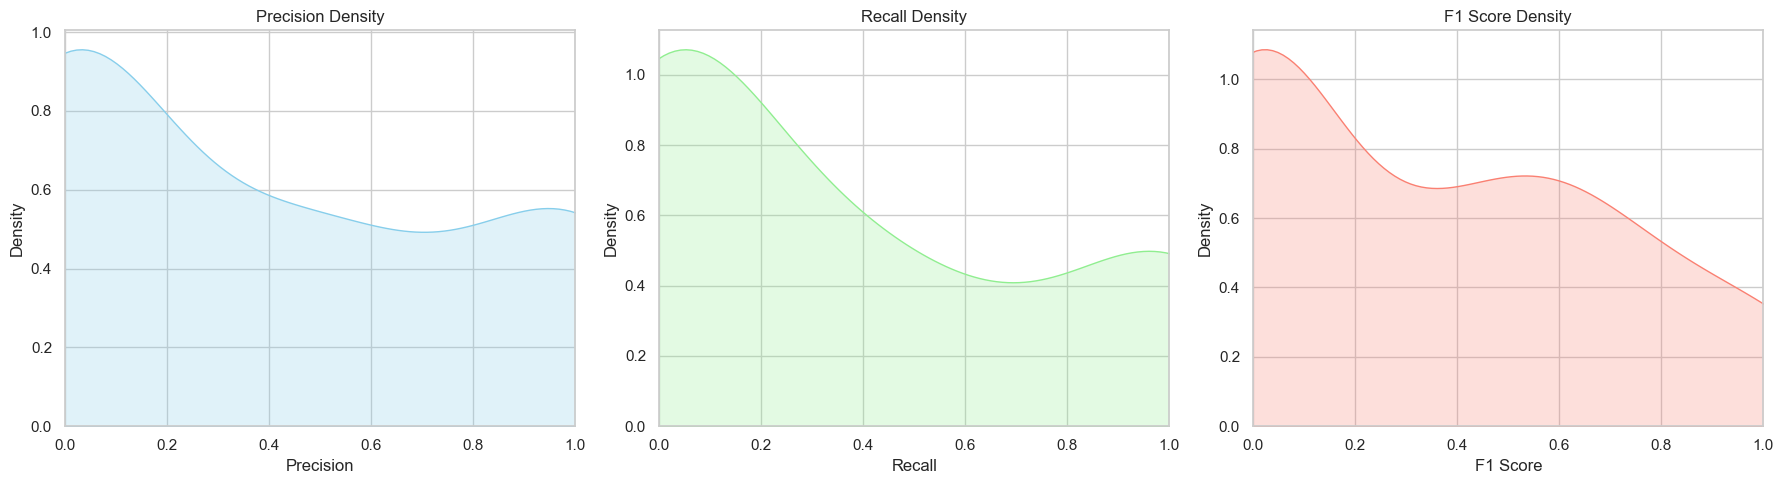

Macro Precision: 0.2040
Macro Recall: 0.2724
Macro F1 Score: 0.2118
Location : Results_26_27


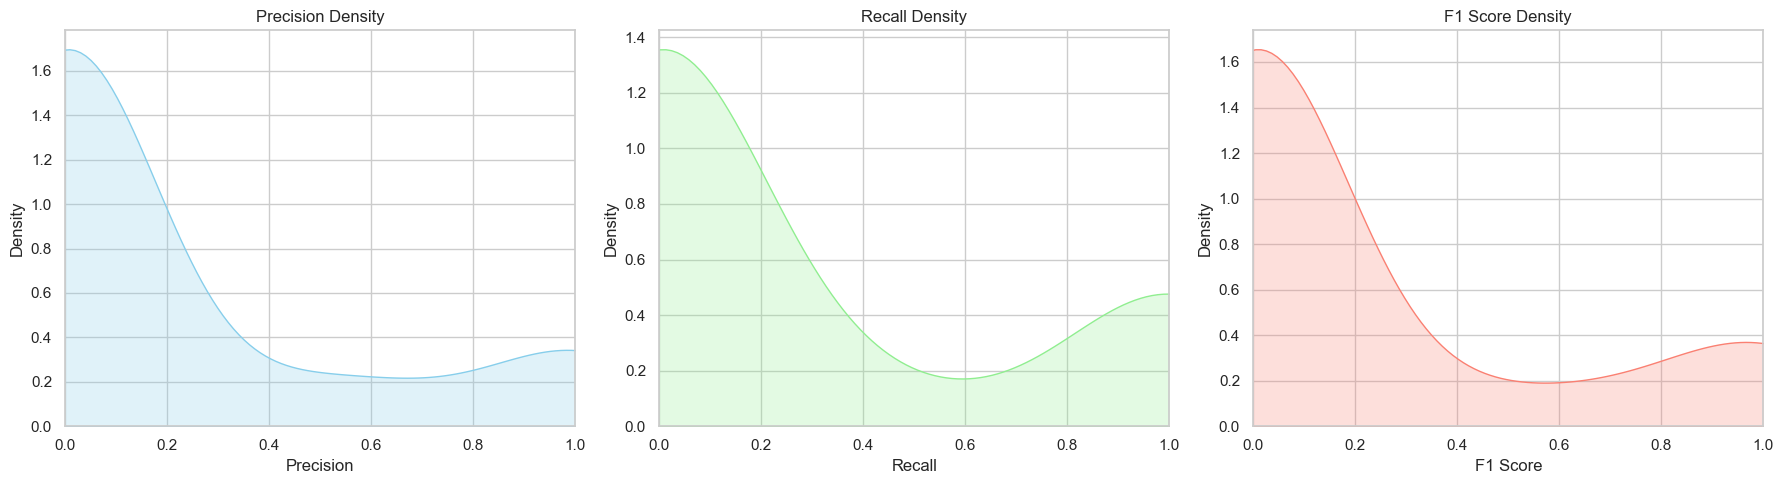

In [8]:
for i in range(len(df_list)):
    plot_matrices(df_list[i], loc_list[i])

In [19]:
df1

,text,disaster,gpe,detected_gpe,response_time,query_tokens,response_tokens,precision,recall,f1
0,"Major Tsunami Warning 1 1, 4 22pm The Tsunami ...","tsunami, ground, Warning, Tsunami, Warning, Ts...",NaN,"""1 Coastal areas, 2 Rivers, 3 Lakes, 4 tsunami.""",6.0752,86,17,NaN,NaN,NaN
1,According to mathematical and tectonophysical ...,earthquake,NaN,v Volcanic Epoch,4.7211,92,5,NaN,NaN,NaN
2,Earlier video showing smaller wave caused by t...,"Tsunami, earthquake","Niigata Prefecture, Joetsu, Seki, Japan, N...","Joetsu City, Niigata Prefecture, Noto Peninsula",6.9786,76,14,0.666667,0.4,0.500000
3,"Tsunami Advisory 8 8, 4 44pm A Tsunami Advisor...","tsunami, ground, Tsunami, Tsunami",NaN,8 4,8.0080,80,3,NaN,NaN,NaN
4,UNCONFIRMED video of considerable damage in No...,"earthquake, magnitude, damage","Japan, Anamizu, Japan, Noto","Noto, Japan, Anamizu, Japan",4.1660,73,10,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
681,"The 7.6 magnitude quake, which struck the Noto...",magnitude,"Ishikawa prefecture, Noto Peninsula","Noto Prefecture, Ishikawa prefecture",15.7392,76,10,0.500000,0.5,0.500000
682,A portion of the sales of nottestellata2024 of...,"Earthquake, Earthquake","Japan, Noto Peninsula","Noto Peninsula Earthquake, Miyagi Children's E...",6.6286,84,12,0.000000,0.0,0.000000
683,People are returning to their damaged houses t...,"rescue, collapse",NaN,"country, country",5.2317,55,3,NaN,NaN,NaN
684,Supporting Recovery for the Noto Peninsula Thi...,"disaster, earthquake","Noto Peninsula, Noto Peninsula",Noto Peninsula,4.7731,86,3,1.000000,1.0,1.000000
